In [1]:
#! pip install -U statsmodels

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
sns.set(context="paper", font="monospace")

## Data Loading

In [4]:
ws_df = pd.read_csv('../data/website_checker_data.csv')

In [5]:
ws_df.describe()

,cnt_bad_websites,total,perc_bad_websites,MA(7),Median(7)
count,115.000000,115.000000,115.000000,110.000000,110.000000
mean,81.426087,941.443478,9.809565,9.698545,9.320909
std,63.341051,271.025156,7.644250,6.770552,6.959211
min,0.000000,1.000000,1.400000,2.360000,2.300000
25%,34.000000,609.500000,2.950000,3.337500,2.900000
50%,56.000000,1035.000000,7.400000,8.690000,7.500000
75%,106.000000,1171.500000,15.450000,13.795000,14.600000
max,313.000000,1457.000000,26.700000,24.230000,24.300000


In [6]:
ws_df.head()

,dt,cnt_bad_websites,total,perc_bad_websites,MA(7),Median(7)
0,2021-03-01,106,601,17.6,NaN,NaN
1,2021-03-02,107,602,17.8,NaN,NaN
2,2021-03-03,96,602,15.9,NaN,NaN
3,2021-03-05,94,602,15.6,NaN,NaN
4,2021-03-06,116,601,19.3,NaN,NaN


## Filter out period with hole

In [7]:
# ws_df = ws_df[ws_df.dt > '2021-03-03']
ws_df = ws_df[ws_df.dt > '2021-04-01']
ws_df

,dt,cnt_bad_websites,total,perc_bad_websites,MA(7),Median(7)
30,2021-04-02,0,1,14.9,12.39,14.5
31,2021-04-03,91,602,15.1,12.50,14.6
32,2021-04-04,85,607,14.0,12.34,14.5
33,2021-04-05,139,602,23.1,13.57,14.6
34,2021-04-06,43,606,7.1,12.66,14.6
...,...,...,...,...,...,...
110,2021-06-24,108,1168,9.2,4.26,2.9
111,2021-06-25,54,1231,4.4,4.63,3.3
112,2021-06-26,77,1138,6.8,5.19,4.4
113,2021-06-27,24,1032,2.3,5.26,4.4


## Data Visualization

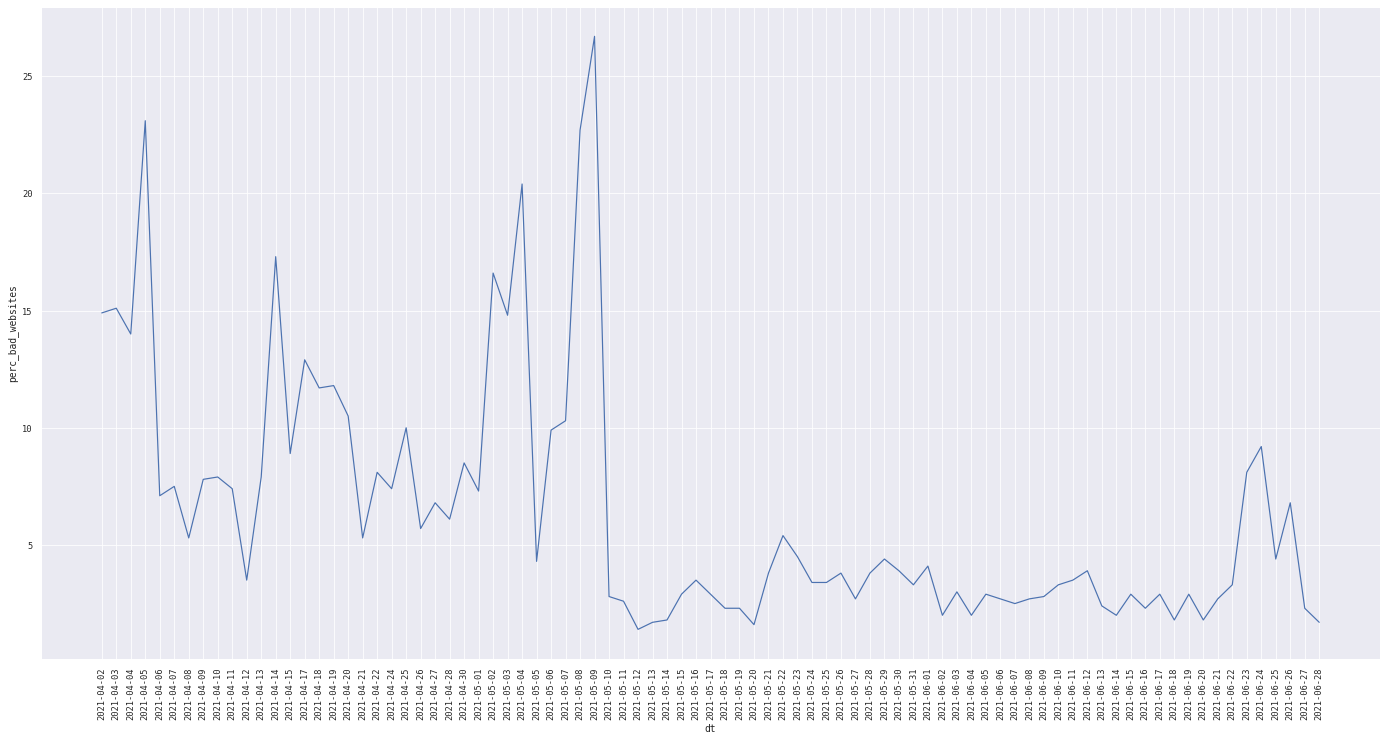

In [8]:
plt.figure(figsize=(24, 12))
sns.lineplot(data=ws_df, x="dt", y="perc_bad_websites")
#_, labels = plt.xticks()
#plt.setp(labels, rotation=90)
plt.xticks(rotation=90);

Day '2021-04-02' is an outlier, had just one lead!

## Data preparations

In [9]:
ws_df_its = ws_df[["dt", "perc_bad_websites"]].copy()
ws_df_its["time"] = np.array(range(1, ws_df_its.shape[0]+1))
ws_df_its

,dt,perc_bad_websites,time
30,2021-04-02,14.9,1
31,2021-04-03,15.1,2
32,2021-04-04,14.0,3
33,2021-04-05,23.1,4
34,2021-04-06,7.1,5
...,...,...,...
110,2021-06-24,9.2,81
111,2021-06-25,4.4,82
112,2021-06-26,6.8,83
113,2021-06-27,2.3,84


In [10]:
ws_df_its["level"] = pd.Series(ws_df_its.dt >= '2021-05-10').map(int).values
ws_df_its

,dt,perc_bad_websites,time,level
30,2021-04-02,14.9,1,0
31,2021-04-03,15.1,2,0
32,2021-04-04,14.0,3,0
33,2021-04-05,23.1,4,0
34,2021-04-06,7.1,5,0
...,...,...,...,...
110,2021-06-24,9.2,81,1
111,2021-06-25,4.4,82,1
112,2021-06-26,6.8,83,1
113,2021-06-27,2.3,84,1


In [11]:
ws_df_its["trend"] = ws_df_its["level"].cumsum()
ws_df_its[ws_df_its.dt >= '2021-05-08']

,dt,perc_bad_websites,time,level,trend
63,2021-05-08,22.7,34,0,0
64,2021-05-09,26.7,35,0,0
65,2021-05-10,2.8,36,1,1
66,2021-05-11,2.6,37,1,2
67,2021-05-12,1.4,38,1,3
68,2021-05-13,1.7,39,1,4
69,2021-05-14,1.8,40,1,5
70,2021-05-15,2.9,41,1,6
71,2021-05-16,3.5,42,1,7
72,2021-05-17,2.9,43,1,8


## Preliminary analysis

### OLS

In [12]:
results = smf.ols('perc_bad_websites ~ time + level + trend', data=ws_df_its).fit()

In [13]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      perc_bad_websites   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     29.48
Date:                Sun, 25 Jul 2021   Prob (F-statistic):           5.54e-13
Time:                        20:15:43   Log-Likelihood:                -232.38
No. Observations:                  85   AIC:                             472.8
Df Residuals:                      81   BIC:                             482.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3807      1.318      7.117      0.0

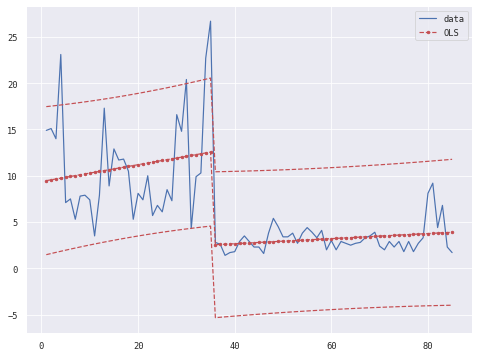

In [14]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))
x =  ws_df_its.time.to_numpy()
y = ws_df_its.perc_bad_websites.to_numpy()
ax.plot(x, y, 'b-', label="data")
ax.plot(x, results.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

### Robust regression

In [15]:
#X = ws_df_its[["time","level","trend"]].to_numpy()
#X = sm.add_constant(X)
#hub_results = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
hub_results = smf.rlm('perc_bad_websites ~ time + level + trend', data=ws_df_its).fit()

In [16]:
# hub_results = huber_t.fit()
print(hub_results.params)
print(hub_results.bse)
print(hub_results.summary(yname='perc_bad_websites',
            xname=['%s' % var_name for var_name in ("Intercept","time","level","trend")]))

Intercept    8.532966
time         0.044786
level       -7.365692
trend       -0.031906
dtype: float64
Intercept    0.722597
time         0.035010
level        0.916527
trend        0.040570
dtype: float64
                    Robust linear Model Regression Results                    
Dep. Variable:      perc_bad_websites   No. Observations:                   85
Model:                            RLM   Df Residuals:                       81
Method:                          IRLS   Df Model:                            3
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 25 Jul 2021                                         
Time:                        20:15:45                                         
No. Iterations:                    27                                         
    

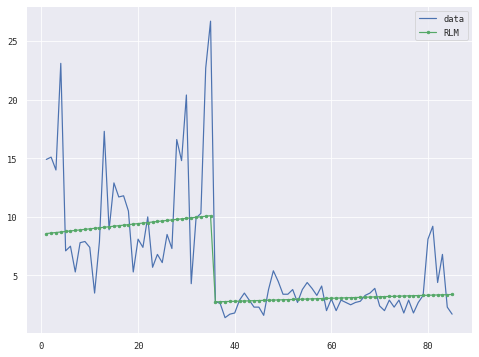

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
x =  ws_df_its.time.to_numpy()
y = ws_df_its.perc_bad_websites.to_numpy()
ax.plot(x, y, 'b-', label="data")
ax.plot(x, hub_results.fittedvalues, 'g.-', label="RLM")
# ax.plot(x, iv_u, 'r--')
# ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

## Autocorrelation analysis

In [18]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

1.2845195202485462

Out of \[1.5,2.5\] range

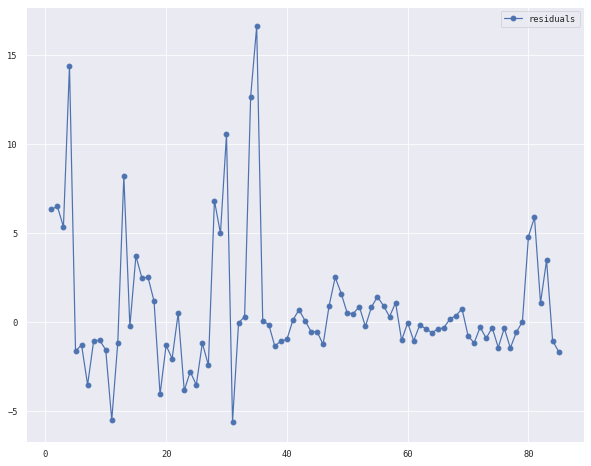

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
x =  ws_df_its.time.to_numpy()
y = ws_df_its.perc_bad_websites.to_numpy()
ax.plot(x, y - hub_results.fittedvalues, 'o-', label="residuals")
#ax.plot(x, y - hub_results.fittedvalues, 'b-', label="residuals")
# ax.plot(x, iv_u, 'r--')
# ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

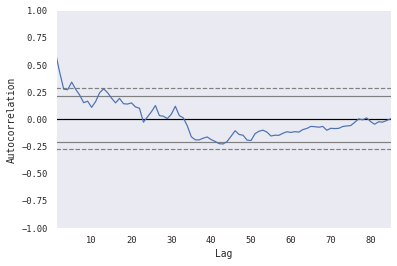

In [20]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(ws_df_its.perc_bad_websites)

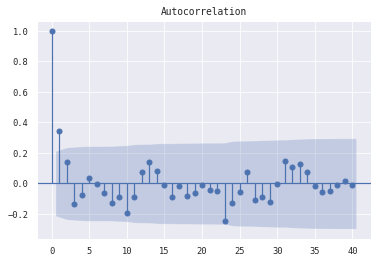

In [21]:
# autocorrelation
sm.graphics.tsa.plot_acf(results.resid, lags=40)
plt.show()

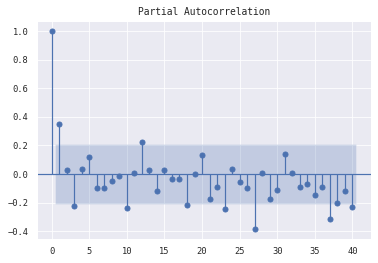

In [22]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(results.resid, lags=40)
plt.show()

In [41]:
from statsmodels.tsa.arima.model import ARIMA
X = ws_df_its[["time","level","trend"]].to_numpy()
arima_results = ARIMA(y, X, order=(0,0,2)).fit()

In [24]:
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   85
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -223.735
Date:                Sun, 25 Jul 2021   AIC                            461.469
Time:                        20:15:49   BIC                            478.568
Sample:                             0   HQIC                           468.347
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7628      1.352      6.480      0.000       6.112      11.413
x1             0.1671      0.058      2.861      0.004       0.053       0.282
x2           -13.6389      2.209     -6.173      0.0

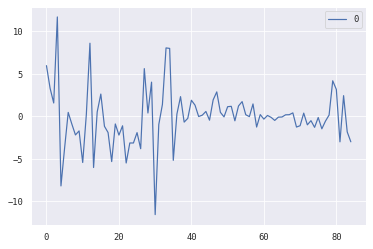

In [25]:
# line plot of residuals
residuals = pd.DataFrame(arima_results.resid)
residuals.plot()
plt.show()


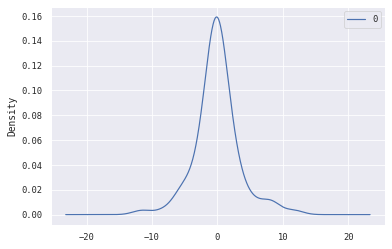

In [26]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

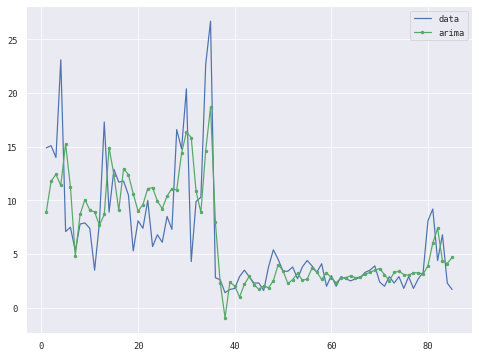

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
x =  ws_df_its.time.to_numpy()
y = ws_df_its.perc_bad_websites.to_numpy()
ax.plot(x, y, 'b-', label="data")
ax.plot(x, arima_results.fittedvalues, 'g.-', label="arima")
# ax.plot(x, iv_u, 'r--')
# ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

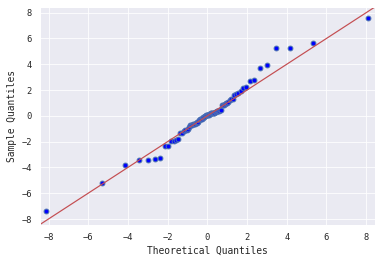

In [28]:
from statsmodels.graphics.gofplots import qqplot

fig = sm.qqplot(arima_results.resid, sp.stats.t, fit=True, line="45")
plt.show()

In [29]:
print(arima_results.params)

[  8.76284589   0.16711739 -13.63890429  -0.09806731   0.4320999
   0.43064493  11.25162528]


In [30]:
# const         19.7887      1.694     11.685      0.000      16.469      23.108
# x1            -0.1536      0.041     -3.726      0.000      -0.234      -0.073
# x2            -9.8440      2.236     -4.403      0.000     -14.226      -5.462
# x3             0.2387      0.104      2.291      0.022       0.034       0.443
# ma.L1          0.4627      0.078      5.943      0.000       0.310       0.615
# ma.L2          0.4247      0.089      4.772      0.000       0.250       0.599
# sigma2        14.6667      1.347     10.886      0.000      12.026      17.307
start=ws_df_its[ws_df_its.dt == '2021-05-10']["time"].values[0]
end=ws_df_its.shape[0]
print(f"start={start}\t end={end}")
params = arima_results.params
y_cf1 = [arima_results.fittedvalues[0], arima_results.fittedvalues[1]]
y_cf2 = [arima_results.fittedvalues[start-1], arima_results.fittedvalues[start-2]]
for i in range(2, end):
    #y_pred = 19.7887 -0.1536 * X[i][0] +0.4627*(y[i-1] - y_cf2[i-1]) +0.4247*(y[i-2] - y_cf2[i-2])
    y_pred = params[0] + params[1] * X[i][0]
    y_cf1.append(y_pred)
    if i >= start:
        y_pred = (params[0] + params[2]) + (params[1] * X[i][0]) + (params[3] * X[i][2]) 
        y_cf2.append(y_pred)
y_cf2 = np.array(y_cf2[2:])
#y_cf2 = np.hstack([np.zeros(start),y_cf2])
y_cf2,y_cf2.shape

start=36	 end=85


(array([1.11115058, 1.18020067, 1.24925076, 1.31830085, 1.38735094,
        1.45640103, 1.52545112, 1.5945012 , 1.66355129, 1.73260138,
        1.80165147, 1.87070156, 1.93975165, 2.00880174, 2.07785183,
        2.14690192, 2.21595201, 2.28500209, 2.35405218, 2.42310227,
        2.49215236, 2.56120245, 2.63025254, 2.69930263, 2.76835272,
        2.83740281, 2.9064529 , 2.97550298, 3.04455307, 3.11360316,
        3.18265325, 3.25170334, 3.32075343, 3.38980352, 3.45885361,
        3.5279037 , 3.59695379, 3.66600388, 3.73505396, 3.80410405,
        3.87315414, 3.94220423, 4.01125432, 4.08030441, 4.1493545 ,
        4.21840459, 4.28745468, 4.35650477, 4.42555485]),
 (49,))

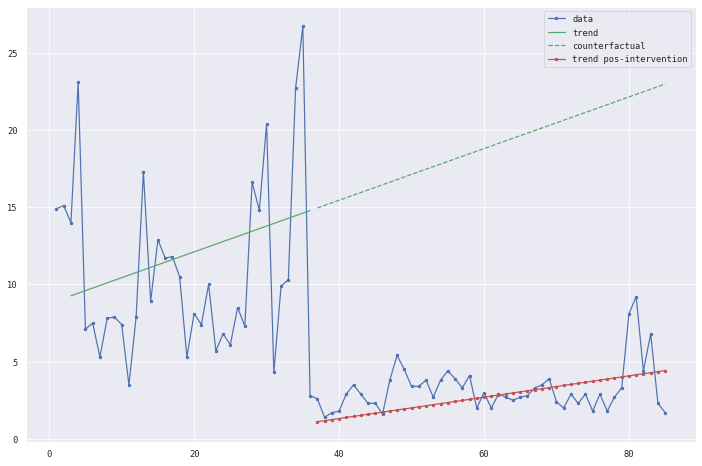

In [67]:
fig, ax = plt.subplots(figsize=(12,8))
x =  ws_df_its.time.to_numpy()
y = ws_df_its.perc_bad_websites.to_numpy()
ax.plot(x, y, 'b.-', label="data")
ax.plot(x[2:start], y_cf1[2:start], 'g-', label="trend")
ax.plot(x[start:], y_cf1[start:], 'g--', label="counterfactual")
ax.plot(x[start:], y_cf2, 'r.-', label="trend pos-intervention")
ax.legend(loc='best');


In [65]:
# from statsmodels.graphics.tsaplots import plot_predict

# fig, ax = plt.subplots(figsize=(10,8))
# ax.plot(x, y, 'g.-', label="data")
# fig = plot_predict(arima_results, start=0, end=84, alpha=0.05, dynamic=True, ax=ax, plot_insample=True)
# plt.show()

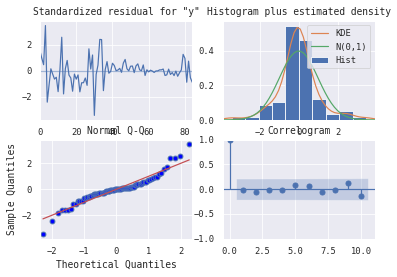

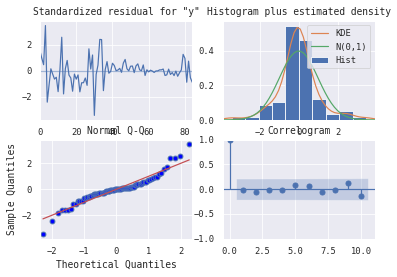

In [66]:
arima_results.plot_diagnostics()

# TODO

- Beta regression https://gist.github.com/brentp/089c7d6d69d78d26437f
- GLM https://www.statsmodels.org/devel/glm.html
- https://www.statsmodels.org/devel/mixed_glm.html
- Bayesian GP: https://juanitorduz.github.io/gp_ts_pymc3/